<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>6</code><b>

<b>Group Members:</b>  

1. <code>Uchenna_Chima_B00949727</code>


# 1. Dataset Information 

<h4> Dataset Name:<code> Nursery</code></h4>
<h4> Link to the Dataset: <code>https://archive.ics.uci.edu/dataset/76/nursery</code> </h4>
<h4> Dataset Description: </h4>
<code>This dataset contains data derived from a decision model that was used to rank nursery school applications during the 1980's in Ljubljana, Slovenia.</code>


# 2. Task Information 

<h4> Task Goal: <code>Based on an applicant's financial status, social status and family status, determine the strength an applicant's application.</code></h4>
<h4> Task Description: </h4>
    <code>In this dataset, we are given labels which indicate the strength of an applicants application (not_recom, recommend, very_recom, priority, spec_prior) and the task is to develop a model which predicts the aforementioned based on the 8 different features given. Similarly to the first dataset, this dataset also presents a multi-class classification problem. I will be comparing the perfomance of five different machine learning models: Decision Tree, Random Forest, Naive Bayes, SVM and KNN (Hyperparameter Tuning applied where possible) in order to find out which models perform the best by utilizing all 8 features in the training, testing and validation stages. 



# 3. Task Implementation: Coding

### 3.1.1 Data Pre-Processing: Data preparation

In [2]:
#Reference [Source #1]

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Data Loading
nursery_data = pd.read_csv('nursery_dataset/nursery.data')
nursery_data.columns=['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'target']

print(nursery_data.head(10))
#Due to how the data was provided, i needed to fix the column names, and apply label encoding on all features and labels. 
label_encoder = LabelEncoder()

for i in range(0,9):

    encoded_feature = label_encoder.fit_transform(nursery_data[nursery_data.columns[i]])

    nursery_data[nursery_data.columns[i]] = encoded_feature

#Convert all columns types to floating points (Will be useful when applying ML algorithms later)
for column in nursery_data.columns:
    nursery_data[column] = nursery_data[column].astype(float)
    

print("Label-Encoded Nursery Dataset: \n")
print(nursery_data)

#nursery_data.to_excel('encoded_nursery.xlsx')


  parents has_nurs      form children     housing     finance         social  \
0   usual   proper  complete        1  convenient  convenient        nonprob   
1   usual   proper  complete        1  convenient  convenient        nonprob   
2   usual   proper  complete        1  convenient  convenient  slightly_prob   
3   usual   proper  complete        1  convenient  convenient  slightly_prob   
4   usual   proper  complete        1  convenient  convenient  slightly_prob   
5   usual   proper  complete        1  convenient  convenient    problematic   
6   usual   proper  complete        1  convenient  convenient    problematic   
7   usual   proper  complete        1  convenient  convenient    problematic   
8   usual   proper  complete        1  convenient      inconv        nonprob   
9   usual   proper  complete        1  convenient      inconv        nonprob   

        health      target  
0     priority    priority  
1    not_recom   not_recom  
2  recommended   recommend  
3  

### 3.1.2 Data Pre-Processing: Data Cleaning and Transformation.

In [3]:
#Reference [Source #1]
#Pre-processing (Null, Duplicates, Outlier Detection, Feature Selection, Standardization, Train/Test/Validation Splits) 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

                                                #Data Cleaning (Removing duplicated and Null Entries)
nursery_data = nursery_data.drop_duplicates()
print("Shape after removing duplicates:", nursery_data.shape)

null_data = nursery_data.isnull().sum()
print("\nChecking for Null Data:")
print(null_data)



                                            #Data Transformation (Normalization/Standardization)

#Performed Normalization on all features except (Target and Children). 
#Normalized (MinMaxScaler) all features except above ones as they naturally have discrete categories
#Used Standarziation (StandardScaler()) on 'Children' feature as it is continous

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

#convert data to numpy array for easier data transformation
nursery_data_numpy = nursery_data.to_numpy()

#Iterate through first 11 features and apply standard/min-max scaler
for i in range(0, len(nursery_data_numpy[0])-1):

    if i == 3:
        #Scale particular feature
        scaled_feature = standard_scaler.fit_transform(nursery_data_numpy[:,i].reshape(-1,1))
        #Apply scaled result to live dataset
        nursery_data_numpy[:, i] = scaled_feature.flatten()
    else:
        #Scale particular feature
        scaled_feature = min_max_scaler.fit_transform(nursery_data_numpy[:,i].reshape(-1,1))
        
        #Apply scaled result to live dataset
        nursery_data_numpy[:, i] = scaled_feature.flatten()
    

#convert numpy array back to Pandas DataFrame
nursery_data = pd.DataFrame(nursery_data_numpy, columns=['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'target'])

print("\nNormalized Dataset: \n")
print(nursery_data.head(10))


Shape after removing duplicates: (12959, 9)

Checking for Null Data:
parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
target      0
dtype: int64

Normalized Dataset: 

   parents  has_nurs  form  children  housing  finance  social  health  target
0      1.0      0.75   0.0 -1.341786      0.0      0.0     0.0     0.5     1.0
1      1.0      0.75   0.0 -1.341786      0.0      0.0     0.0     0.0     0.0
2      1.0      0.75   0.0 -1.341786      0.0      0.0     1.0     1.0     2.0
3      1.0      0.75   0.0 -1.341786      0.0      0.0     1.0     0.5     1.0
4      1.0      0.75   0.0 -1.341786      0.0      0.0     1.0     0.0     0.0
5      1.0      0.75   0.0 -1.341786      0.0      0.0     0.5     1.0     1.0
6      1.0      0.75   0.0 -1.341786      0.0      0.0     0.5     0.5     1.0
7      1.0      0.75   0.0 -1.341786      0.0      0.0     0.5     0.0     0.0
8      1.0      0.75   0.0 -1.341786      0.0      1.0    

### 3.1.3 Data Pre-Processing: Outlier Removal, Over Sampling & Data Splitting(train & test & validation sets).

In [4]:

from scipy import stats
from sklearn.model_selection import train_test_split


                                            #Outlier Detection (Applied Z-score Method for outlier detection)

#Checking for outliers using Z-Score
z_scores = np.abs(stats.zscore(nursery_data))
threshold = 2.5

#Mask for outlier detection (True for outliers, False for inliers)
outlier_mask = (z_scores > threshold).any(axis=1)

#Filter out rows with outliers
nursery_data_no_outliers = nursery_data[~outlier_mask]


                                                    #Apply Random Over Sampling

#Target Label-Encoding, 0=not_recom , 1= priority, 2=recommended , 3=spec_prior , 4=very_recom

over_sample_class_recommend = 2.0
over_sample_factor_recommend = 700

over_sample_class_very_recommend = 4.0
over_sample_factor_very_recommend = 2


over_sample_mask_recommend = nursery_data_no_outliers['target'] == over_sample_class_recommend
over_sample_mask_very_recommend = nursery_data_no_outliers['target'] == over_sample_class_very_recommend

class_samples_to_oversample_recommend = nursery_data_no_outliers[over_sample_mask_recommend]
class_samples_to_oversample_very_recommend = nursery_data_no_outliers[over_sample_mask_very_recommend]

# Oversample the classes
oversampled_recommend_data = pd.concat([class_samples_to_oversample_recommend] * over_sample_factor_recommend, ignore_index=True)
oversampled_very_recommend_data = pd.concat([class_samples_to_oversample_very_recommend] * over_sample_factor_very_recommend, ignore_index=True)

# Combine the oversampled data frames with the original DataFrame
nursery_df_oversampled = pd.concat([nursery_data_no_outliers, oversampled_recommend_data, oversampled_very_recommend_data], ignore_index=True, axis=0)

print('\n\t\t\t*** Data After removing outliers (using z-score) and applying over sampling ***\n\n', nursery_df_oversampled)



                                                    #Split dataset into train,test,validation sets

# Define 'X' and 'y' for training & testing
X = nursery_df_oversampled.drop(columns=['target'])
y = nursery_df_oversampled['target']

# Split the dataset into a training set and a combined test/validation set
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.40, random_state=42)

# Split the combined test/validation set into a test set and a validation set
X_test, X_validation, y_test, y_validation = train_test_split(X_combined, y_combined, test_size=0.5, random_state=42)



print('\n\t\t\t*** Train/Test/Validation Split Results (60/20/20) ***')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('X_validation shape:', X_validation.shape)
print('y_validation shape:', y_validation.shape)



			*** Data After removing outliers (using z-score) and applying over sampling ***

        parents  has_nurs      form  children  housing  finance  social  \
0          1.0      0.75  0.000000 -1.341786      0.0      0.0     0.0   
1          1.0      0.75  0.000000 -1.341786      0.0      0.0     0.0   
2          1.0      0.75  0.000000 -1.341786      0.0      0.0     1.0   
3          1.0      0.75  0.000000 -1.341786      0.0      0.0     1.0   
4          1.0      0.75  0.000000 -1.341786      0.0      0.0     1.0   
...        ...       ...       ...       ...      ...      ...     ...   
14310      0.5      0.50  0.666667 -0.447331      0.0      0.0     1.0   
14311      0.5      0.50  0.666667  0.447124      0.0      0.0     0.0   
14312      0.5      0.50  0.666667  0.447124      0.0      0.0     1.0   
14313      0.5      0.50  0.666667  1.341579      0.0      0.0     0.0   
14314      0.5      0.50  0.666667  1.341579      0.0      0.0     1.0   

       health  target  
0

# 4. Exploratory Data Analysis: 

### 4.1 EDA

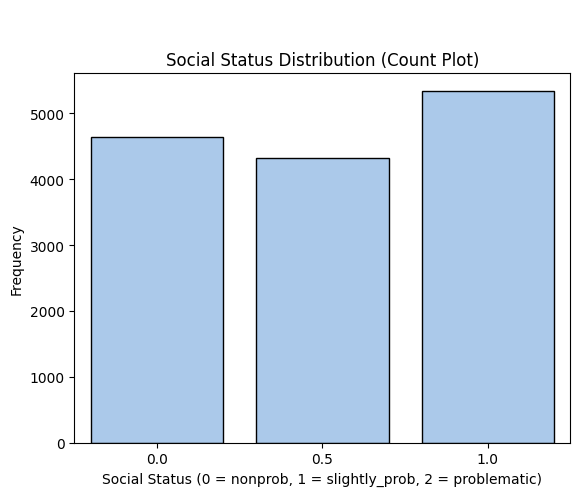

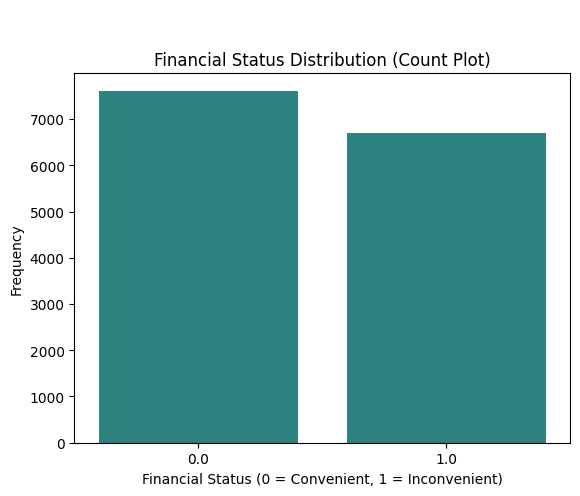

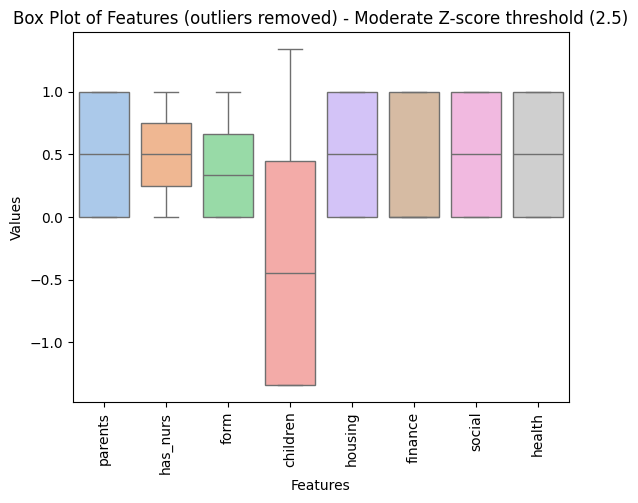

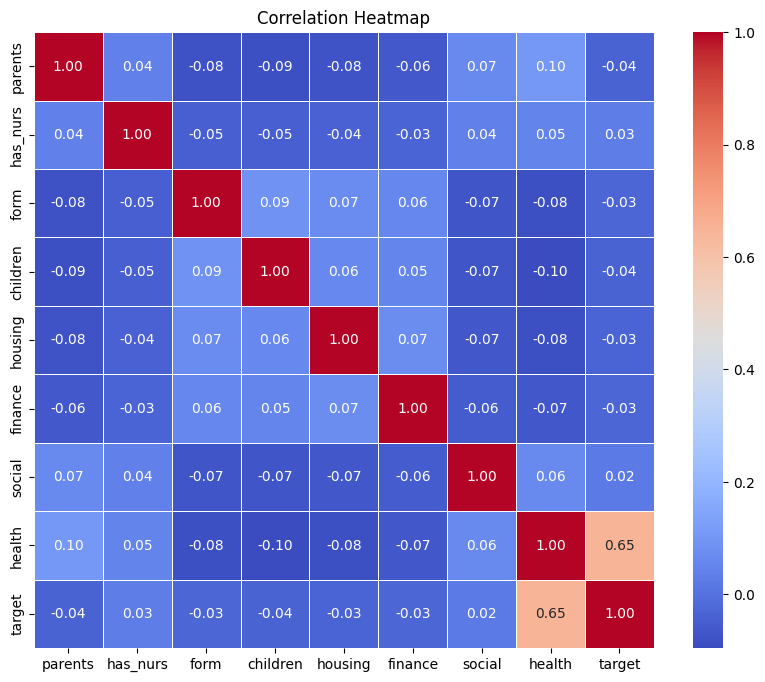

In [5]:
#Reference [Source #1]


import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

                                                     #Count Plots

#Count Plot #1
sns.countplot(x='social', data=nursery_df_oversampled, palette='pastel', hue = 0, legend=False, edgecolor='black')

#Labels
plt.xlabel('Social Status (0 = nonprob, 1 = slightly_prob, 2 = problematic)')
plt.ylabel('Frequency')
plt.title('\n\nSocial Status Distribution (Count Plot)')

plt.show()


#Count Plot #2
sns.countplot(x='finance', data=nursery_df_oversampled, palette='viridis', hue = 0, legend=False)

#Labels
plt.xlabel('Financial Status (0 = Convenient, 1 = Inconvenient)')
plt.ylabel('Frequency')
plt.title('\n\nFinancial Status Distribution (Count Plot)')

plt.show()


                                                     #Box Plots

#Box Plot #1
sns.boxplot(data=nursery_df_oversampled.drop(columns=['target']), palette='pastel')
plt.xticks(rotation=90)

#labels 
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Features (outliers removed) - Moderate Z-score threshold (2.5)')

plt.show()


                                                     #Heat Map

# Concat data
data = pd.concat([X, y], axis=1)

# Calculate correlations
correlations = data.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 5. Model Development and Training 

### 5.1 - Decision Tree Model Development and Training.

In [5]:
#Reference [Source #1]
#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Hyper parameter tuning, Performance metrics (accuracy e.t.c), Algorithm Comparison, Analysis

#Baseline Model
dt_initial_classifier = DecisionTreeClassifier(random_state=10)
dt_initial_classifier.fit(X_train,y_train)
dt_initial_y_pred = dt_initial_classifier.predict(X_test)

#Hyperparameter Tuning
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
dt_grid_search = GridSearchCV(dt_initial_classifier, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train,y_train)
dt_best_params = dt_grid_search.best_params_
print("Best Hyperparameters for Decision Tree Model:", dt_best_params)

#Tuned Model
dt_best_classifier = DecisionTreeClassifier(**dt_best_params, random_state=10)
dt_best_classifier.fit(X_train,y_train)

dt_best_y_pred = dt_best_classifier.predict(X_validation)

Best Hyperparameters for Decision Tree Model: {'criterion': 'gini', 'max_depth': None}


### 5.2 - Random Forest ML Algorithm Application.

In [6]:
#Reference [Source #1]
#Apply Random Forest
from sklearn.ensemble import RandomForestClassifier

#Baseline Model
rf_initial_classifier = RandomForestClassifier(n_estimators=10, random_state=10)
rf_initial_classifier.fit(X_train, y_train)
rf_initial_y_pred = rf_initial_classifier.predict(X_test)

#Hyperparameter Tuning
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_grid_search = GridSearchCV(rf_initial_classifier, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train,y_train)
rf_best_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest Model:", rf_best_params)

#Tuned Model
rf_best_classifier = RandomForestClassifier(**rf_best_params, random_state=10)
rf_best_classifier.fit(X_train,y_train)

rf_best_y_pred = rf_best_classifier.predict(X_validation)

Best Hyperparameters for Random Forest Model: {'max_depth': None, 'n_estimators': 200}


### 5.3 - Naive Bayes ML Algorithm Application.

In [7]:
#Reference [Source #1]
#Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB(priors=None)
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

### 5.4 - SVM ML Algorithm Application.

In [8]:
#Reference [Source #1]
#Apply SVM
from sklearn.svm import SVC

#Baseline Model
svm_initial_classifier = SVC(kernel="linear")
svm_initial_classifier.fit(X_train, y_train)
svm_initial_y_pred = svm_initial_classifier.predict(X_test)

#Hyperparameter Tuning
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid_search = GridSearchCV(svm_initial_classifier, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train,y_train)
svm_best_params = svm_grid_search.best_params_
print("Best Hyperparameters for SVM Model:", svm_best_params)

#Tuned Model
svm_best_classifier = SVC(**svm_best_params, random_state=10, probability=True)
svm_best_classifier.fit(X_train,y_train)
svm_best_y_pred = svm_best_classifier.predict(X_validation)


Best Hyperparameters for SVM Model: {'C': 10, 'kernel': 'rbf'}


### 5.5: K-NN ML Algorithm Application.

In [9]:
#Reference [Source #1]
#Apply K-NN
from sklearn.neighbors import KNeighborsClassifier

#Baseline Model
knn_initial_classifier = KNeighborsClassifier()
knn_initial_classifier.fit(X_train, y_train)
knn_initial_y_pred = knn_initial_classifier.predict(X_test)

#Hyperparameter Tuning
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid_search = GridSearchCV(knn_initial_classifier, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train,y_train)
knn_best_params = knn_grid_search.best_params_
print("Best Hyperparameters for KNN Model:", knn_best_params)

#Tuned Model
knn_best_classifier = KNeighborsClassifier(**knn_best_params)
knn_best_classifier.fit(X_train,y_train)
knn_best_y_pred = knn_best_classifier.predict(X_validation)

Best Hyperparameters for KNN Model: {'n_neighbors': 5, 'weights': 'distance'}


# 6. Model Evaluation 

### 6.1 - Decision Tree Algorithm Evaluation

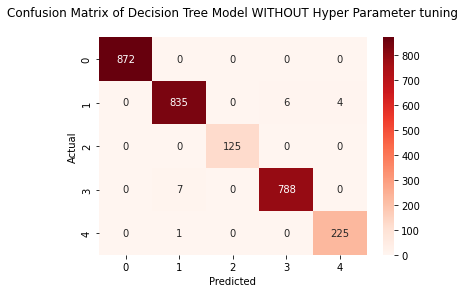

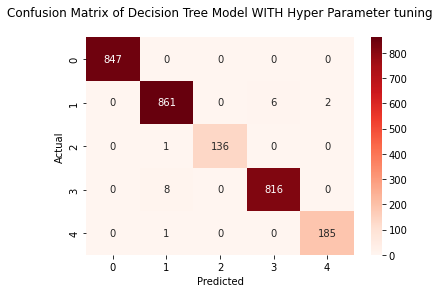



			*** Performance Metrics of Decision Tree Model***

Accuracy:  0.9937128885784142
Precision:  0.9941048973008112
Recall:  0.993681932817476
F-measure:  0.9938887611015401


In [10]:
#Reference [Source #1]
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


#Confusion Matrices
dt_confusion_matrix_initial = confusion_matrix(dt_initial_y_pred, y_test)
sns.heatmap(dt_confusion_matrix_initial, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Decision Tree Model WITHOUT Hyper Parameter tuning\n")
plt.show()

dt_confusion_matrix_tuned = confusion_matrix(dt_best_y_pred, y_validation)

sns.heatmap(dt_confusion_matrix_tuned, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Decision Tree Model WITH Hyper Parameter tuning\n")
plt.show()

#Performance metrics (Accuracy e.t.c)
dt_accuracy_score = accuracy_score(dt_best_y_pred, y_validation)
dt_precision_score = precision_score(dt_best_y_pred, y_validation, average='macro')
dt_recall_score = recall_score(dt_best_y_pred, y_validation, average='macro')
dt_f_score = f1_score(dt_best_y_pred, y_validation, average='macro')

print('\n\n\t\t\t*** Performance Metrics of Decision Tree Model***\n')
print('Accuracy: ', dt_accuracy_score)
print('Precision: ', dt_precision_score)
print('Recall: ', dt_recall_score)
print('F-measure: ', dt_f_score)

### 6.2 - Random Forest Algorithm Evaluation

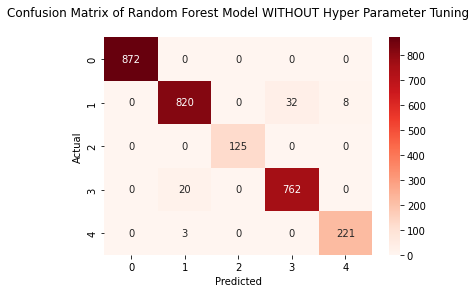

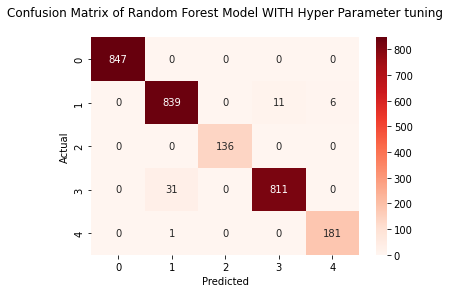



			*** Performance Metrics of Random Forest Model***

Accuracy:  0.9828850855745721
Precision:  0.9835586126691783
Recall:  0.9875657158567229
F-measure:  0.9854833049396705


In [11]:
#Reference [Source #1]

#Confusion Matrices

rf_confusion_matrix_initial = confusion_matrix(rf_initial_y_pred, y_test)
sns.heatmap(rf_confusion_matrix_initial, annot=True, cmap="Reds" , fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Model WITHOUT Hyper Parameter Tuning\n")
plt.show()


rf_confusion_matrix_tuned = confusion_matrix(rf_best_y_pred, y_validation)
sns.heatmap(rf_confusion_matrix_tuned, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Model WITH Hyper Parameter tuning\n")
plt.show()

#Performance metrics (Accuracy e.t.c)
rf_accuracy_score = accuracy_score(rf_best_y_pred, y_validation)
rf_precision_score = precision_score(rf_best_y_pred, y_validation, average='macro')
rf_recall_score = recall_score(rf_best_y_pred, y_validation, average='macro')
rf_f_score = f1_score(rf_best_y_pred, y_validation, average='macro')

print('\n\n\t\t\t*** Performance Metrics of Random Forest Model***\n')
print('Accuracy: ', rf_accuracy_score)
print('Precision: ', rf_precision_score)
print('Recall: ', rf_recall_score)
print('F-measure: ', rf_f_score)

### 6.3 - Naive Bayes ML Algorithm Evaluation.

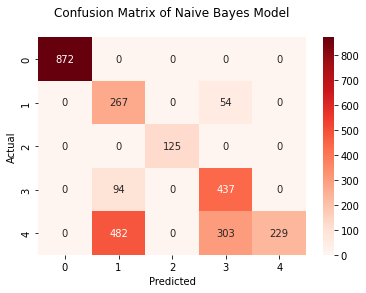



			*** Performance Metrics of Naive Bayes Model***

Accuracy:  0.6741180579811387
Precision:  0.7734207624801671
Recall:  0.7761178966250308
F-measure:  0.697369784623888


In [12]:
#Reference [Source #1]

#Confusion Matrices
nb_confusion_matrix = confusion_matrix(nb_y_pred, y_test)

sns.heatmap(nb_confusion_matrix, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Naive Bayes Model\n")


plt.show()

#Performance metrics (Accuracy e.t.c)
nb_accuracy_score = accuracy_score(nb_y_pred, y_test)
nb_precision_score = precision_score(nb_y_pred, y_test, average='macro')
nb_recall_score = recall_score(nb_y_pred, y_test, average='macro')
nb_f_score = f1_score(nb_y_pred, y_test, average='macro')

print('\n\n\t\t\t*** Performance Metrics of Naive Bayes Model***\n')
print('Accuracy: ', nb_accuracy_score)
print('Precision: ', nb_precision_score)
print('Recall: ', nb_recall_score)
print('F-measure: ', nb_f_score)

### 6.4 - SVM ML Algorithm Evaluation.

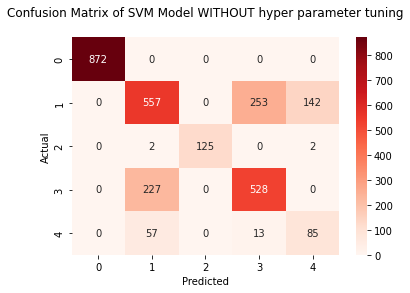

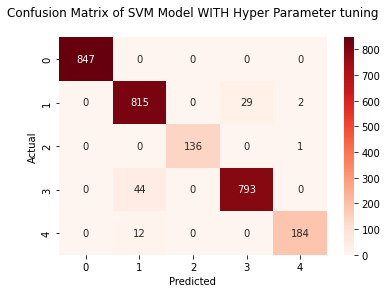



			*** Performance Metrics of SVM Model***

Accuracy:  0.969263010827803
Precision:  0.976876699771671
Recall:  0.9684529032792746
F-measure:  0.9725000643049441


In [13]:
#Reference [Source #1]

#Confusion Matrices

svm_confusion_matrix_initial = confusion_matrix(svm_initial_y_pred, y_test)
sns.heatmap(svm_confusion_matrix_initial, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVM Model WITHOUT hyper parameter tuning\n")
plt.show()


svm_confusion_matrix_tuned = confusion_matrix(svm_best_y_pred, y_validation)
sns.heatmap(svm_confusion_matrix_tuned, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVM Model WITH Hyper Parameter tuning\n")
plt.show()

#Performance metrics (Accuracy e.t.c)
svm_accuracy_score = accuracy_score(svm_best_y_pred, y_validation)
svm_precision_score = precision_score(svm_best_y_pred, y_validation, average='macro')
svm_recall_score = recall_score(svm_best_y_pred, y_validation, average='macro')
svm_f_score = f1_score(svm_best_y_pred, y_validation, average='macro')

print('\n\n\t\t\t*** Performance Metrics of SVM Model***\n')
print('Accuracy: ', svm_accuracy_score)
print('Precision: ', svm_precision_score)
print('Recall: ', svm_recall_score)
print('F-measure: ', svm_f_score)

### 6.5: K-NN Algorithm Evaluation.

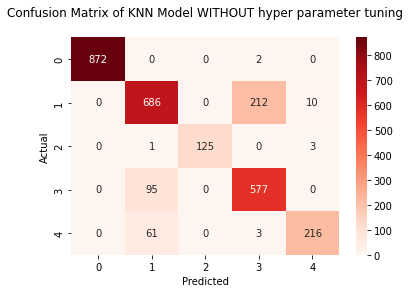

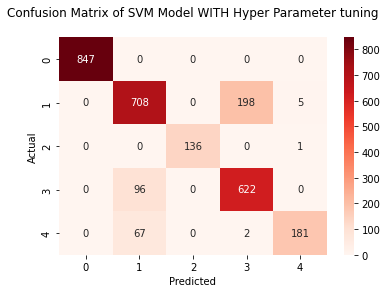



			*** Performance Metrics of KNN Model***

Accuracy:  0.8711142158574922
Precision:  0.907492843815524
Recall:  0.8720327883723222
F-measure:  0.8854234569566378


In [14]:
#Reference [Source #1]

#Confusion Matrices

knn_confusion_matrix_initial = confusion_matrix(knn_initial_y_pred, y_test)
sns.heatmap(knn_confusion_matrix_initial, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of KNN Model WITHOUT hyper parameter tuning\n")
plt.show()


knn_confusion_matrix_tuned = confusion_matrix(knn_best_y_pred, y_validation)
sns.heatmap(knn_confusion_matrix_tuned, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVM Model WITH Hyper Parameter tuning\n")
plt.show()

#Performance metrics (Accuracy e.t.c)
knn_accuracy_score = accuracy_score(knn_best_y_pred, y_validation)
knn_precision_score = precision_score(knn_best_y_pred, y_validation, average='macro')
knn_recall_score = recall_score(knn_best_y_pred, y_validation, average='macro')
knn_f_score = f1_score(knn_best_y_pred, y_validation, average='macro')

print('\n\n\t\t\t*** Performance Metrics of KNN Model***\n')
print('Accuracy: ', knn_accuracy_score)
print('Precision: ', knn_precision_score)
print('Recall: ', knn_recall_score)
print('F-measure: ', knn_f_score)

# 7. Analysis


### 7.1 Analysis of all Algorithms based on performance metrics.

Unlike the small dataset (wine dataset), when considering the five Machine Learning algorithms used in my experiments for this large dataset (nursery dataset - 12,960 instances), the results varied quite a bit. On this dataset, the Decision Tree and Random Forest algorithm exhibited near-identical results with accuracy, precision, recall and F1_Scores above 98% thus showing a near-perfect classification on this dataset. Unlike the previous dataset, KNN slightly underperformed when compared to SVM as it had an accuracy score of (87.3%) whereas SVM had an accuracy score of (96.9%). Both KNN and SVM had balanced precision and recall scores. Last but not least, the least desired algorithm remains the same as Naive Bayes scored an accuracy of 67.4% and had a significantly lower precision, recall and F1_score in comparison to the other four algorithms. When providing a recommendation for a slightly larger dataset, a choice between Decision Tree and Random forest would suffice as they both achieved near-perfect classification results. However, the Decision Tree algorithm had a very slight advantage over Random Forest in terms of precision, recall and F-score with an average of about 0.5%.

### References:

1. Chatgpt (no date) ChatGPT. Available at: https://openai.com/chatgpt (Accessed: 07 November 2023).